In [0]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks

Cloning into 'foster_2020'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 284 (delta 54), reused 147 (delta 27), pack-reused 109
Receiving objects: 100% (284/284), 59.55 MiB | 23.36 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (120/120), done.
/content/foster_2020/Homeworks


# IF OPENING IN COLAB, PLEASE REMEMBER TO SAVE THE NOTEBOOK TO YOUR GOOGLE DRIVE

To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/Homework%203.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [0]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "./data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

__2. Split the data into 80% training data and 20% test data.__

In [0]:
# Your code goes here
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [0]:
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7028,0,72,103.20,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7029,0,11,29.60,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [0]:
# The code below is just meant as an example for you to compute the ROC Area using cross validation.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

target = "Churn_Yes"
predictors = df.columns[df.columns != target]
example_model = DecisionTreeClassifier()
# Remember to only use the training data here!!
avg_auc = cross_val_score(example_model, df[predictors], df[target], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.661599220393075


**Decision Tree Classifier**

In [0]:
# Your code goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
target = "Churn_Yes"
predictors = train.columns[train.columns != target]
model = DecisionTreeClassifier()
avg_auc = cross_val_score(model, train[predictors], train[target], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.6523529216427586


In [0]:
for i in range(10):
  k = np.power(2,i)
  Desmodel = DecisionTreeClassifier(min_samples_leaf=k)
  scores = cross_val_score(Desmodel, train[predictors], train[target], scoring ="roc_auc",cv=10)
  print("When min_samples_leaf is "+ str(k) +":")
  print ("10 folds Cross Validated Accuracy and scoring method is Roc: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))  

When min_samples_leaf is 1:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.658 +/- 0.019
When min_samples_leaf is 2:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.694 +/- 0.017
When min_samples_leaf is 4:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.737 +/- 0.024
When min_samples_leaf is 8:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.774 +/- 0.019
When min_samples_leaf is 16:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.809 +/- 0.015
When min_samples_leaf is 32:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.828 +/- 0.017
When min_samples_leaf is 64:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.831 +/- 0.018
When min_samples_leaf is 128:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.832 +/- 0.016
When min_samples_leaf is 256:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.828 +/- 0.013
When min_samples_leaf is 512:
10 folds Cross Val

So after trying different parameters of min_samples_leaf, I found when the
parameter = 64, the accuracy is biggest.

**logistic regression:**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
i = 1.0
while i < 10:
  Logmodel = LogisticRegression(C=i, max_iter=1000)
  target = "Churn_Yes"
  predictors = train.columns[train.columns != target]
  Logmodel.fit(train[predictors], train[target])
  scores = cross_val_score(Logmodel, train[predictors], train[target], scoring ="roc_auc",cv=10)
  print("When parameter C is "+ str(i) +":")
  print ("10 folds Cross Validated Accuracy and scoring method is Roc: %0.3f +/- %0.5f" % (scores.mean(), scores.std()))  
  i = i + 1.0

When parameter C is 1.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01726
When parameter C is 2.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01731
When parameter C is 3.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01725
When parameter C is 4.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01721
When parameter C is 5.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01733
When parameter C is 6.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01731
When parameter C is 7.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01731
When parameter C is 8.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01724
When parameter C is 9.0:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.844 +/- 0.01724


**KNN：**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:

k_lis = [i for i in range(1,20)]

for x in k_lis:
  Knnmodel = KNeighborsClassifier(n_neighbors=x)
  scores = cross_val_score(Knnmodel, train[predictors], train[target], scoring ="roc_auc",cv=10)
  print("When parameter n_neighbors is "+ str(x) +":")
  print ("10 folds Cross Validated Accuracy and scoring method is Roc: %0.3f +/- %0.5f" % (scores.mean(), scores.std()))  

When parameter n_neighbors is 1:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.665 +/- 0.02384
When parameter n_neighbors is 2:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.720 +/- 0.02093
When parameter n_neighbors is 3:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.753 +/- 0.02348
When parameter n_neighbors is 4:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.774 +/- 0.02616
When parameter n_neighbors is 5:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.784 +/- 0.02201
When parameter n_neighbors is 6:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.789 +/- 0.02094
When parameter n_neighbors is 7:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.790 +/- 0.02188
When parameter n_neighbors is 8:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.795 +/- 0.02170
When parameter n_neighbors is 9:
10 folds Cross Validated Accuracy and scoring method is Roc: 0.798 +/- 

After comparing the 10 folds cross validated accuracy, I found when we use logistic regression model, the accuracy is highest. So I will choose to use Logistic Regression Model.

__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

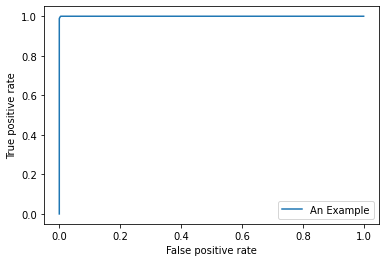

In [0]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the training data here!! 
example_model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = example_model.predict_proba(df[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(df[target], probs)
plt.plot(fpr, tpr, label="An Example")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

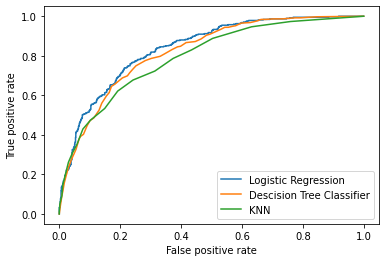

In [0]:
# Your code goes here 
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the training data here!! 
Logmodel = LogisticRegression(C=3.0, max_iter=1000)
Logmodel.fit(train[predictors], train[target])
# And to use the test data here!!
probs = Logmodel.predict_proba(test[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(test[target], probs)
plt.plot(fpr, tpr, label="Logistic Regression")

Desmodel = DecisionTreeClassifier(min_samples_leaf=64)
Desmodel.fit(train[predictors], train[target])
probs2 = Desmodel.predict_proba(test[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(test[target], probs2)
plt.plot(fpr, tpr, label="Descision Tree Classifier")

Knnmodel = KNeighborsClassifier(n_neighbors=20)
Knnmodel.fit(train[predictors], train[target])
probs3 = Knnmodel.predict_proba(test[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(test[target], probs3)
plt.plot(fpr, tpr, label="KNN")

plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

I choose the best parameter for each model. The three of them are coming together. If the ROC Curve is closer to the upper left, it means the model is more accurate. I decided to use Logistic Regression as the best model. 

__5. What would be the potential benefit of stopping someone from leaving? HINT: Take a look at the description of the data and the retention offer.__

Put your answer here using Markdown.

If we could stop someone from leaving, we can maintain our relationship with our existing customers and make more profits not only from new customers, but also from these non-leaving customers. And the profit we made of existing customers is higher than the retention cost, so we should provide them with the retention offer.

__6. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.__

In [0]:
# Your code goes here
subtraining, subtest = train_test_split(train, test_size=0.1)

In [0]:
model = LogisticRegression(C=2.0, max_iter=1000)
target = "Churn_Yes"
predictors = subtraining.columns[subtraining.columns != target]
model.fit(subtraining[predictors], subtraining[target])

#Make the prediction
probs = model.predict_proba(subtest[predictors])[:,1]

In [0]:
#offer_value = data[target] * data.MonthlyCharges * 12 - retention_cost
copyset = subtest.copy()
copyset['profit'] = copyset.apply(lambda x: (x['Churn_Yes']*12*x['MonthlyCharges'])-200, axis=1)
sort_index = np.argsort(probs)[::-1] #the location of rank (from high to low)
profit_ranked = np.array(copyset['profit'])[sort_index] 
profit_cum_ranked = np.cumsum(profit_ranked)

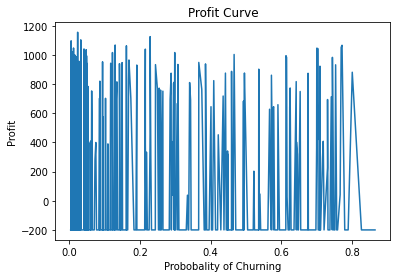

In [0]:
prob_rank = np.sort(probs)
plt.plot(prob_rank,copyset['profit'])
plt.xlabel('Probobality of Churning')
plt.ylabel('Profit')
plt.title('Profit Curve')
plt.show()

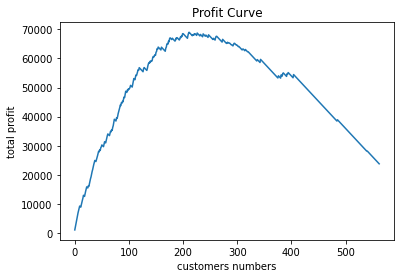

In [0]:
plt.plot([i for i in range(len(profit_cum_ranked))], profit_cum_ranked)
plt.xlabel('customers numbers')
plt.ylabel('total profit')
plt.title('Profit Curve')
plt.show()

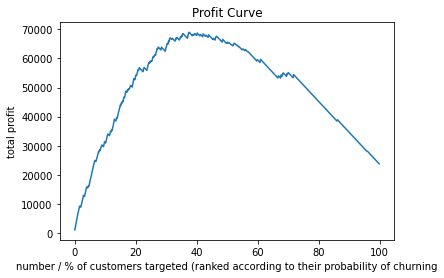

In [34]:
plt.plot([i*100/(len(profit_cum_ranked)) for i in range(len(profit_cum_ranked))], profit_cum_ranked)
plt.xlabel('number / % of customers targeted (ranked according to their probability of churning')
plt.ylabel('total profit')
plt.title('Profit Curve')
plt.show()

In [0]:
probs_rank = probs[::-1]
prob_location = int(len(probs_rank)*0.25)
prob_threshold = probs_rank[location] #calculate the first 25% customers with probability of churning ranked 

In [60]:
profit_loc = int(len(profit_cum_ranked)*0.25)
profit_threshold = profit_cum_ranked[profit_loc]
# print(profit_threshold)

58836.00000000001


In [62]:
print('The first 25% customers, the threshold of probobility will be '+ str(prob_threshold))
print('If we provide the retention offer to 25% customers, the total profits will be '+str(profit_threshold))

The first 25% customers, the threshold of probobility will be 0.4667674314503322
If we provide the retention offer to 25% customers, the total profits will be 58836.00000000001


We can see that the profit increase at the begining with the number of customers increase. But then the total profit decrease because we provide the retention offer to some of the customers whose probability of churning is low. This will increase our cost, which leads to the decrease of profit. According to the chart, I plan to provide the retention offer to the first 40% of customers with probability of churning ranked. 

But we are allowed to only provide 25% of the customers. So the company should provide all the first 25% customers with probability of churning ranked.

 **And customer with probability of churning higher than 0.47 should be provided with this retention offer. Thus the profit we get will be 58836.**

__7. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

In [0]:
sort_idx = np.argsort(copyset['MonthlyCharges'])[::-1] #the location of rank (from high to low)
profit_ranked_mc = np.array(copyset['profit'])[sort_idx] # from high to low
profit_cum_ranked_mc = np.cumsum(profit_ranked_mc)

Text(0.5, 1.0, 'Cumulative Profit Curve ranking by Montly Charges')

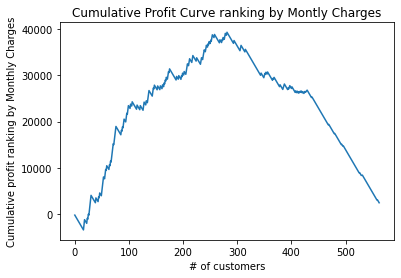

In [0]:
plt.plot([i for i in range(len(copyset['MonthlyCharges']))],profit_cum_ranked_mc)
plt.xlabel('# of customers')
plt.ylabel('Cumulative profit ranking by Monthly Charges')
plt.title('Cumulative Profit Curve ranking by Montly Charges')

From the chart, we can see that if we provided the retention offer whose monthly charges is higher, the profit we get is smaller than providing the retention offer to those probability of churning is higher. The highest profit is less than 40000 which is smaller than the profit we can in Q6. So, I think the probability of churning is more important to consider about than monthly charges.

**So the threshold I have chose is also the probability of churning higher than 0.47.**

__8. Now the you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?__

In [0]:
# Your code goes here
model = LogisticRegression(C=2.0, max_iter=1000)
target = "Churn_Yes"
predictors = train.columns[train.columns != target]
model.fit(train[predictors], train[target])

#Make the prediction
probs = model.predict_proba(test[predictors])[:,1]

In [0]:
test_copy = test.copy()
test_copy['profit'] = test_copy.apply(lambda x: (x['Churn_Yes']*12*x['MonthlyCharges'])-200, axis=1)
sort_index = np.argsort(probs)[::-1] 
total_profit_ranked = np.array(test_copy['profit'])[sort_index] 
total_profit_cum_ranked = np.cumsum(total_profit_ranked)

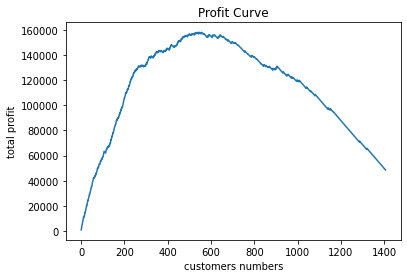

In [75]:
plt.plot([i for i in range(len(total_profit_cum_ranked))], total_profit_cum_ranked)
plt.xlabel('customers numbers')
plt.ylabel('total profit')
plt.title('Profit Curve')
plt.show()

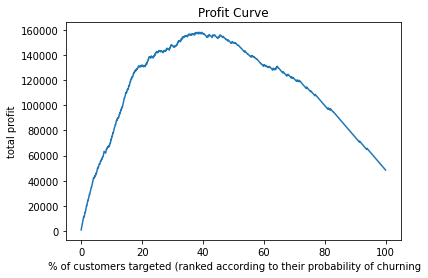

In [76]:
plt.plot([i*100/(len(total_profit_cum_ranked)) for i in range(len(total_profit_cum_ranked))], total_profit_cum_ranked)
plt.xlabel(' % of customers targeted (ranked according to their probability of churning')
plt.ylabel('total profit')
plt.title('Profit Curve')
plt.show()

In [0]:
total_profit_loc = int(len(total_profit_cum_ranked)*0.25)
total_profit_threshold = total_profit_cum_ranked[total_profit_loc]
# print(profit_threshold)

In [0]:
total_probs_rank = probs[::-1]
total_prob_location = int(len(total_probs_rank)*0.25)
total_prob_threshold = total_probs_rank[total_prob_location] #calculate the first 25% customers with probability of churning ranked 

In [79]:
print('The first 25% customers, the threshold of probobility will be '+ str(total_prob_threshold))
print('If we provide the retention offer to 25% customers, the total profits will be '+str(total_profit_threshold))

The first 25% customers, the threshold of probobility will be 0.6619658871511499
If we provide the retention offer to 25% customers, the total profits will be 142055.2


I will gave this retention offer to all the first 25 percentile of the customers with probability of churning ranked to gain the most profit. 

The threshold of probobility of churning is 0.66, and the maximum profit is 142055.